In [17]:
!pip install opencv-python

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [19]:
np.random.seed(0)

In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [22]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

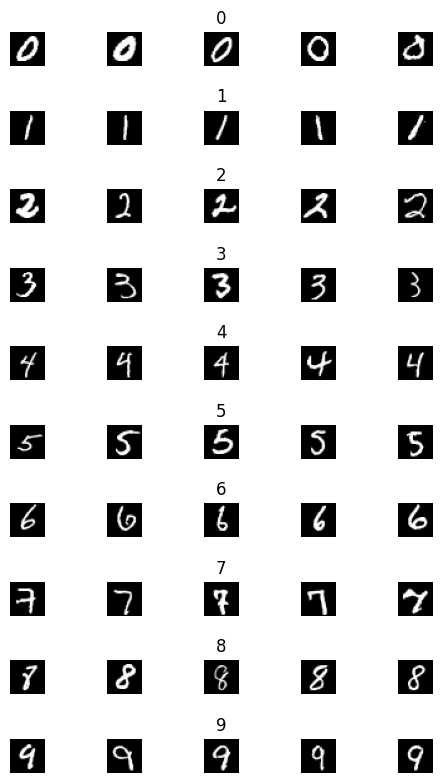

In [23]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

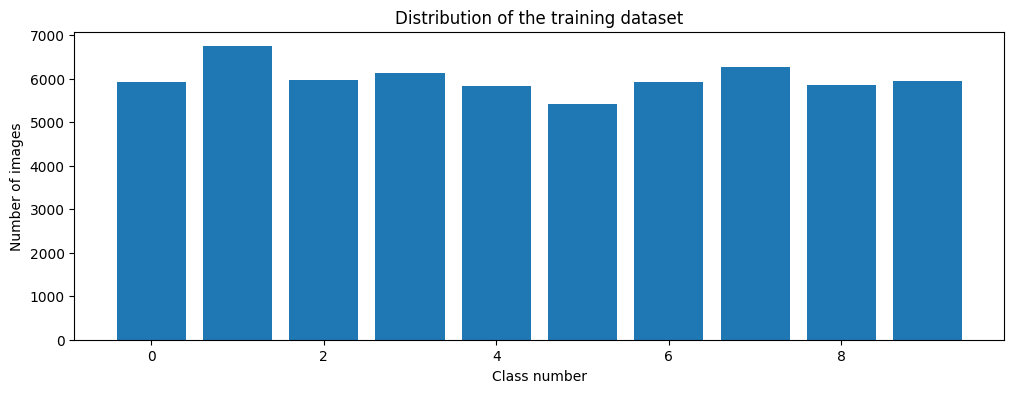

In [24]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [25]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255 
X_test = X_test/255

num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.6476 - loss: 1.0317 - val_accuracy: 0.8753 - val_loss: 0.4112
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.8897 - loss: 0.3724 - val_accuracy: 0.9077 - val_loss: 0.2966
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9013 - loss: 0.3332 - val_accuracy: 0.9178 - val_loss: 0.2669
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 0.9088 - loss: 0.3047 - val_accuracy: 0.9225 - val_loss: 0.2550
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.9138 - loss: 0.2882 - val_accuracy: 0.9275 - val_loss: 0.2419
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9181 - loss: 0.2726 - val_accuracy: 0.9248 - val_loss: 0.2447
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.9175 - loss: 0.2710 - val_accuracy: 0.9278 - val_loss: 0.2426
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.9196 - loss: 0.2644 - 

Text(0.5, 0, 'epoch')

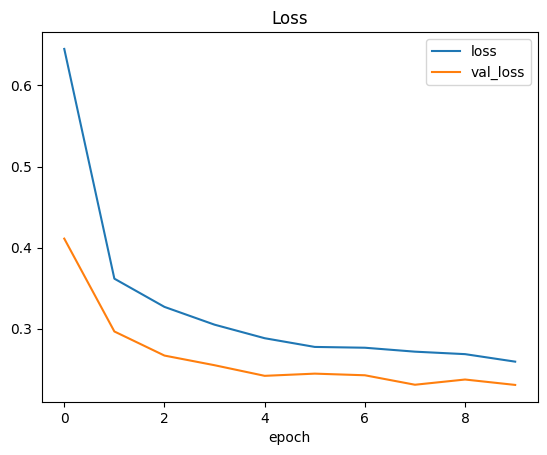

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

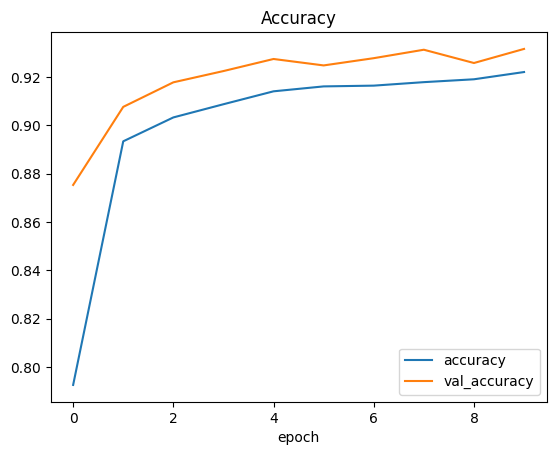

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.29296666383743286
Test accuracy: 0.9151999950408936


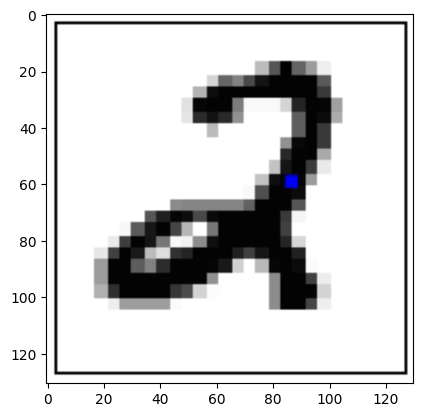

In [30]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

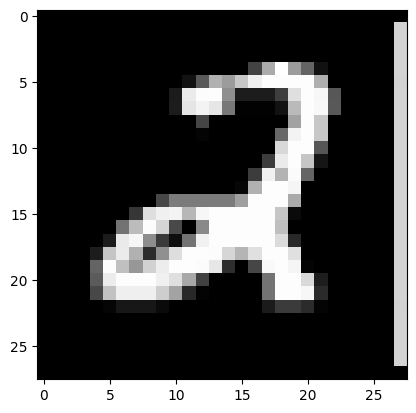

In [31]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [32]:
img = img/255
img = img.reshape(1, 784)

In [34]:
predictions = model.predict(img)
prediction = np.argmax(predictions, axis=-1)
print("predicted digit:", str(prediction[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted digit: 2
